In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from scipy import integrate

%matplotlib inline

    #name    zcmb    zhel   dz         mb      dmb  x1  dx1  color  dcolor  \
0       0  0.0140  0.0140  0.0  14.570019  0.03110   0    0      0       0   
1       1  0.0194  0.0194  0.0  15.227960  0.02645   0    0      0       0   
2       2  0.0264  0.0264  0.0  15.934102  0.02310   0    0      0       0   
3       3  0.0329  0.0329  0.0  16.421783  0.02350   0    0      0       0   
4       4  0.0396  0.0396  0.0  16.836419  0.02845   0    0      0       0   
5       5  0.0475  0.0475  0.0  17.234644  0.03340   0    0      0       0   
6       6  0.0560  0.0560  0.0  17.575846  0.03215   0    0      0       0   
7       7  0.0640  0.0640  0.0  17.910454  0.04390   0    0      0       0   
8       8  0.0721  0.0721  0.0  18.178007  0.03865   0    0      0       0   
9       9  0.0811  0.0811  0.0  18.554386  0.04225   0    0      0       0   
10     10  0.0889  0.0889  0.0  18.700655  0.03635   0    0      0       0   
11     11  0.1001  0.1001  0.0  19.038824  0.03515   0    0     

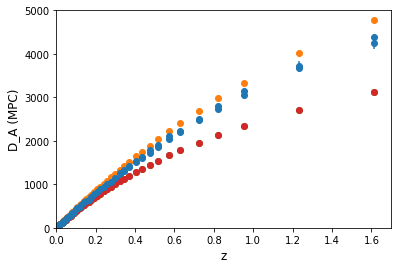

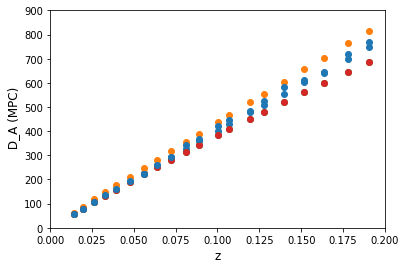

145.7381760821936
1274.042654987179
5762.814283056007
5762.814283056007


In [74]:
# EXERCISE 17.2 + 17.3

data = pd.read_csv('supernova_data.txt', sep='\s+') 
print(data)


i = 0
x = []
y = []
y1 = []
y2 = []
y3 = []
y4 = []
y_err = []

m_data = []
m1 = []
m2 = []
m3 = []
m4 = []


while (i < 40):
    M = -19.3
    z = data['zcmb'][i]
    m = data['mb'][i]
    m_err = data['dmb'][i]

    D_A = ((pow(10,((m-M+5)/5))/(1+z)))/(1000000)
    DA_err = (D_A)*((0.2*2.302585093*m_err))
    
    x.append(z)
    y.append(D_A)
    y_err.append(DA_err)
    (i) = (i + 1)


def integrand(x, H_0, V, m, k):
    return ((300000/H_0)*pow((V + (m*(pow((1+x),3))) + (k*(pow((1+x),3)))),-0.5))

i = 0   
    
while (i < 40):
    z = data['zcmb'][i]
    M = -19.3


    D_A = integrate.quad(integrand, 0, z, args = (73, 0.7, 0.3, 0.0 ))[0]
    m1.append((M-5) + (5*math.log10((D_A*(1000000))*(1+z)))) # EQ. from text, 1000000 inserted to convert units.
    
    y1.append(D_A)
                
    (i) = (i + 1)
    

   
i = 0
while (i < 40):
    z = data['zcmb'][i]

    D_A = integrate.quad(integrand, 0, z, args = (67, 0.7, 0.3, 0.0 ))[0]
    m2.append((M-5) + (5*math.log10((D_A*(1000000))*(1+z))))
    
    y2.append(D_A)

    (i) = (i + 1)
    
i = 0
while (i < 40):
    z = data['zcmb'][i]


    D_A = integrate.quad(integrand, 0, z, args = (73, 0.0, 1.0, 0.0 ))[0]
    m3.append((M-5) + (5*math.log10((D_A*(1000000))*(1+z))))
    
    y3.append(D_A)

    (i) = (i + 1)

i = 0
while (i < 40):
    z = data['zcmb'][i]

    D_A = integrate.quad(integrand, 0, z, args = (73, 0.0, 0.3, 0.7 ))[0]
    m4.append((M-5) + (5*math.log10((D_A*(1000000))*(1+z))))
    
    y4.append(D_A)

    (i) = (i + 1)


plt.errorbar(x, y, yerr=y_err, linestyle='', marker='o')
plt.xlabel('z', size='large')
plt.ylabel('D_A (MPC)', size='large')
plt.scatter(x,y1) # Blue NO ERROR BARS
plt.scatter(x,y2) # Orange

plt.scatter(x,y3) # Green these two plots are identical
plt.scatter(x,y4) # RED

plt.xlim(0.0, 1.7)
plt.ylim(0.0, 5000)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.errorbar(x, y, yerr=y_err, linestyle='', marker='o')
ax1.scatter(x,y1)
ax1.scatter(x,y2)
ax1.scatter(x,y3)
ax1.scatter(x,y4)
plt.xlabel('z', size='large')
plt.ylabel(' D_A (MPC)', size='large')
plt.xlim(0.0, 0.2)
plt.ylim(0.0, 900)
plt.show()

m_err = []
i = 0 
while (i < 40):
    z = data['zcmb'][i]
    m_data.append(data['mb'][i])
    m_err.append(data['dmb'][i])
    
    i = (i+1)
# Data Check: Recorded Magnitude vs Model Magnitude
#print(m_data)
#print(m1)
#print(m2)
#print(m3)
#print(m4) 

m1err = 0
m2err = 0 
m3err = 0
m4err = 0
i = 0 
while (i < 40): # CALCULATES 17.5 RESULTS
    
    q1 = ((pow((m_data[i]-m1[i]),2))/(pow(m_err[i],2)))
    q2 = ((pow((m_data[i]-m2[i]),2))/(pow(m_err[i],2)))
    q3 = ((pow((m_data[i]-m3[i]),2))/(pow(m_err[i],2)))
    q4 = ((pow((m_data[i]-m4[i]),2))/(pow(m_err[i],2)))
    
    m1err = m1err + q1
    m2err = m2err + q2
    m3err = m3err + q3
    m4err = m4err + q4
    
    i = (i+1)

# DISPLAYS 17.5 RESULTS
print(m1err)
print(m2err)
print(m3err)
print(m4err)
     